In [60]:
import pandas as pd
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

## load the data

In [61]:
file_name = 'train set.csv'
train = pd.read_csv(file_name,encoding = "ISO-8859-1")

In [3]:
train.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


In [4]:
file_name = 'test set.csv'
test = pd.read_csv(file_name,encoding = "ISO-8859-1")

In [5]:
test.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936


## prepare the data

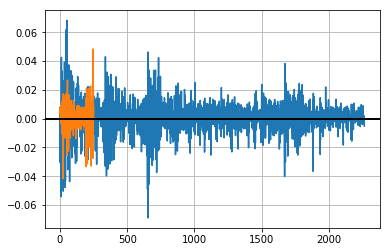

In [7]:
close = train['Close Price']
train['log_change'] = np.log(close.shift(-1)) - np.log(close)
train.log_change.plot(grid=True).axhline(y=0, color='black', lw=2)

close = test['Close Price']
test['log_change'] = np.log(close.shift(-1)) - np.log(close)
test.log_change.plot(grid=True).axhline(y=0, color='black', lw=2)

In [8]:
train.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,log_change
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,-0.004679
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,0.007787
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,-0.030469
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,0.003391
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,-0.021533


In [9]:
test.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,log_change
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232,0.006378
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328,0.004021
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744,0.007009
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120,0.001661
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936,0.001302


In [10]:
def mapping(x):
    if x>0:
        return 1
    else:
        return 0
train['price_change']=train['log_change'].apply(mapping)
test['price_change']=test['log_change'].apply(mapping)
test.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,log_change,price_change
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232,0.006378,1
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328,0.004021,1
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744,0.007009,1
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120,0.001661,1
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936,0.001302,1


In [11]:
train = train.drop(columns=['log_change'])
test = test.drop(columns=['log_change'])

In [12]:
x_train = train.loc[:,train.columns !='price_change']
y_train = train['price_change']
x_test = test.loc[:,test.columns !='price_change']
y_test = test['price_change']

用今天的價格預測明天的漲跌，因此將最後一行row drop

In [13]:
x_train.count()

Date           2264
Open Price     2264
Close Price    2264
High Price     2264
Low Price      2264
Volume         2264
dtype: int64

In [14]:
x_test.count()

Date           252
Open Price     252
Close Price    252
High Price     252
Low Price      252
Volume         252
dtype: int64

In [15]:
x_train = x_train.drop(x_train.index[2263])
x_test = x_test.drop(x_test.index[251])
y_train = y_train.drop(y_train.index[2263])
y_test = y_test.drop(y_test.index[251])

In [16]:
x_train = x_train.drop(columns=['Date'])
x_test = x_test.drop(columns=['Date'])

### normalize the data

In [17]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

In [18]:
x_test

array([[1.45344351e-06, 1.45998575e-06, 1.46002907e-06, 1.45270155e-06,
        1.00000000e+00],
       [1.29046974e-06, 1.29774518e-06, 1.29837179e-06, 1.29043147e-06,
        1.00000000e+00],
       [1.29443629e-06, 1.29666404e-06, 1.29918693e-06, 1.29432204e-06,
        1.00000000e+00],
       ...,
       [9.04759965e-07, 9.44800165e-07, 9.44823137e-07, 8.98427350e-07,
        1.00000000e+00],
       [1.02347978e-06, 1.04289342e-06, 1.04300656e-06, 1.00480782e-06,
        1.00000000e+00],
       [1.20091219e-06, 1.19464995e-06, 1.21124512e-06, 1.18847423e-06,
        1.00000000e+00]])

### setting the parameters

In [19]:
hidden_units = 10    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.001           # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 20          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update

### build the modal

In [20]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=5,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### train the model

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
2263/2263 [==============================] - ETA: 16s - loss: 0.6873 - acc: 0.56 - ETA: 0s - loss: 0.6941 - acc: 0.5246 - 0s 136us/step - loss: 0.6961 - acc: 0.5276
Epoch 2/10
2263/2263 [==============================] - ETA: 0s - loss: 0.6888 - acc: 0.593 - ETA: 0s - loss: 0.6890 - acc: 0.548 - 0s 39us/step - loss: 0.6898 - acc: 0.5462
Epoch 3/10
2263/2263 [==============================] - ETA: 0s - loss: 0.6919 - acc: 0.531 - ETA: 0s - loss: 0.6923 - acc: 0.531 - 0s 34us/step - loss: 0.6915 - acc: 0.5365
Epoch 4/10
2263/2263 [==============================] - ETA: 0s - loss: 0.7082 - acc: 0.500 - ETA: 0s - loss: 0.6914 - acc: 0.545 - 0s 33us/step - loss: 0.6911 - acc: 0.5462
Epoch 5/10
2263/2263 [==============================] - ETA: 0s - loss: 0.6760 - acc: 0.593 - ETA: 0s - loss: 0.6825 - acc: 0.577 - ETA: 0s - loss: 0.6896 - acc: 0.546 - 0s 49us/step - loss: 0.6897 - acc: 0.5462
Epoch 6/10
2263/2263 [====================

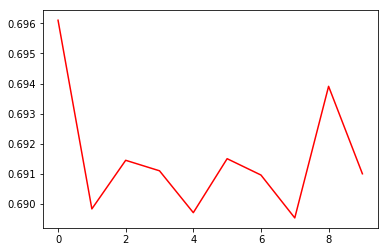

In [21]:
# train the parameters
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

The initial parameters of the network will be randomly determined. We will start on a random part of the loss surface each time. This will lead to a different result.
This is actually a research probelm at the moment. So what can we do if we want a fair competition? We will train our network 20 times and take the average.

###  take the average accuracy

In [22]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size,  
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [23]:
_, test_accs = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:20<00:00,  1.02s/it]


Avgerage Training Accuracy: 0.536942112282531
Avgerage Testing Accuracy: 0.5175298810836327


### violin plot

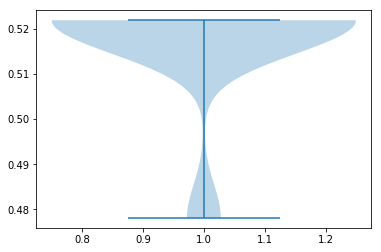

In [24]:
plt.violinplot(test_accs)
plt.show()

we can get the avgerage testing accuracy 51.7%

## drop Volume

In [25]:
x_train = train.loc[:,train.columns !='price_change']
y_train = train['price_change']
x_test = test.loc[:,test.columns !='price_change']
y_test = test['price_change']

In [26]:
x_train = x_train.drop(x_train.index[2263])
x_test = x_test.drop(x_test.index[251])
y_train = y_train.drop(y_train.index[2263])
y_test = y_test.drop(y_test.index[251])

In [27]:
x_train = x_train.drop(columns=['Date'])
x_test = x_test.drop(columns=['Date'])

In [28]:
x_train = x_train.drop(['Volume'], axis=1)
x_test = x_test.drop(['Volume'], axis=1)

### normalize the data

In [29]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

### setting the parameters

In [30]:
hidden_units = 10    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.001           # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 20          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update

### build the modal

In [31]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=4,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

### train the model

Epoch 1/10
2263/2263 [==============================] - ETA: 18s - loss: 0.6991 - acc: 0.56 - ETA: 0s - loss: 0.6928 - acc: 0.5295 - 0s 159us/step - loss: 0.6916 - acc: 0.5325
Epoch 2/10
2263/2263 [==============================] - ETA: 0s - loss: 0.6933 - acc: 0.500 - ETA: 0s - loss: 0.6920 - acc: 0.531 - 0s 39us/step - loss: 0.6919 - acc: 0.5382
Epoch 3/10
2263/2263 [==============================] - ETA: 0s - loss: 0.7074 - acc: 0.437 - ETA: 0s - loss: 0.6922 - acc: 0.524 - 0s 37us/step - loss: 0.6901 - acc: 0.5373
Epoch 4/10
2263/2263 [==============================] - ETA: 0s - loss: 0.6942 - acc: 0.531 - ETA: 0s - loss: 0.6876 - acc: 0.558 - 0s 35us/step - loss: 0.6897 - acc: 0.5413
Epoch 5/10
2263/2263 [==============================] - ETA: 0s - loss: 0.6915 - acc: 0.531 - ETA: 0s - loss: 0.6936 - acc: 0.533 - 0s 34us/step - loss: 0.6928 - acc: 0.5373
Epoch 6/10
2263/2263 [==============================] - ETA: 0s - loss: 0.6870 - acc: 0.562 - ETA: 0s - loss: 0.6932 - acc: 0.52

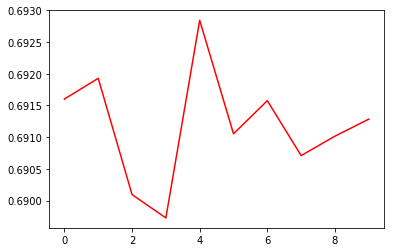

In [32]:
# train the parameters
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

### take the average accuracy

In [33]:
_, test_accs = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:20<00:00,  1.03s/it]


Avgerage Training Accuracy: 0.5415598763178474
Avgerage Testing Accuracy: 0.5197211160187226


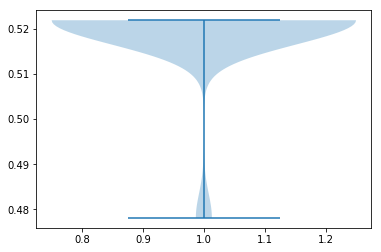

In [34]:
plt.violinplot(test_accs)
plt.show()

In [35]:
print('Min: %s' % np.min(test_accs))
print('Max: %s' % np.max(test_accs))

Min: 0.4780876522520149
Max: 0.5219123509538126


# try to change

change hidden_units

In [40]:
hidden_units = 15    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.              # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 50          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update

In [41]:
def build_model(hidden_units, activation, learning_rate):
    model = models.Sequential()
    model.add(layers.Dense(input_dim=4,
                           units=hidden_units, 
                           activation=activation,
                           kernel_regularizer=regularizers.l2(l2)))
    model.add(layers.Dense(input_dim=hidden_units,
                           units=1,
                           activation='sigmoid',
                           kernel_regularizer=regularizers.l2(l2)))
    model.compile(loss='binary_crossentropy',
                  # Adam is a kind of gradient descent
                  optimizer=optimizers.Adam(lr=learning_rate),
                  metrics=['accuracy'])
    return model

model = build_model(hidden_units, activation, learning_rate)

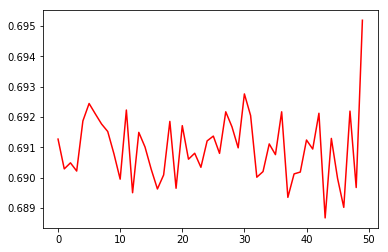

In [42]:
history = model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=False)
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [43]:
_, __ = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:51<00:00,  2.57s/it]


Avgerage Training Accuracy: 0.5461776403531637
Avgerage Testing Accuracy: 0.5219123509538125


change l2

In [44]:
hidden_units = 10    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 200             # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 50          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update

In [45]:
model = build_model(hidden_units, activation, learning_rate)

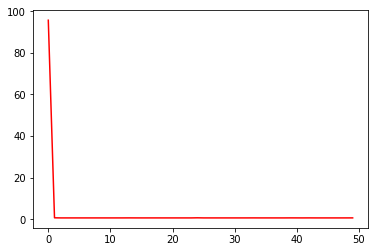

In [46]:
history = model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=False)
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [47]:
_, __ = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:53<00:00,  2.62s/it]


Avgerage Training Accuracy: 0.5323243482472144
Avgerage Testing Accuracy: 0.5153386461485429


change learning_rate

In [48]:
hidden_units = 10    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.              # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 50          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update

In [49]:
model = build_model(hidden_units, activation, learning_rate)

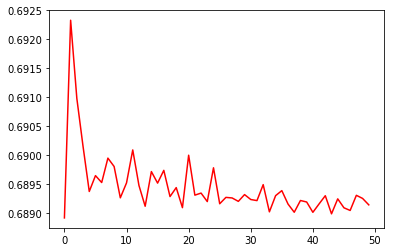

In [50]:
history = model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=False)
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [51]:
_, __ = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:53<00:00,  2.62s/it]


Avgerage Training Accuracy: 0.5461776403531637
Avgerage Testing Accuracy: 0.5219123509538125


change epochs

In [52]:
hidden_units = 10    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.              # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 80          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update

In [53]:
model = build_model(hidden_units, activation, learning_rate)

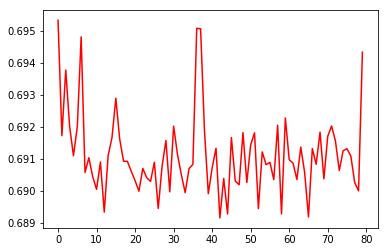

In [54]:
history = model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=False)
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [55]:
_, __ = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:24<00:00,  4.22s/it]


Avgerage Training Accuracy: 0.5323243482472145
Avgerage Testing Accuracy: 0.5153386461485429


change batch_size

In [56]:
hidden_units = 10    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.              # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 50          # how many epochs to train for
batch_size = 40      # how many samples to use for each gradient descent update

In [57]:
model = build_model(hidden_units, activation, learning_rate)

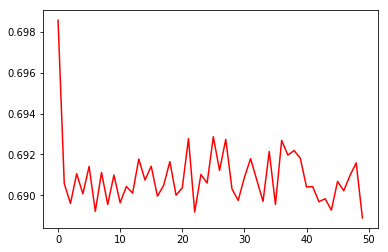

In [58]:
history = model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=False)
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [59]:
_, __ = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:44<00:00,  2.22s/it]


Avgerage Training Accuracy: 0.5277065842118983
Avgerage Testing Accuracy: 0.513147411213453
